문장 임베딩
  - 자연어처리에서 문장을 고정된 크기의 벡터로 변환하는 과정
  - 단어 임베딩과 달리 문장의 의미를 보존하는 것이 목표

Sentence Embedding 기법
  - 단순 평균 벡터(Averaging Word Vectors)
     - 개별 단어의 임베딩을 평균 내어 문장 벡터를 생성
     - 간단하고 계산 비용이 낮지만, 단어 순서와 구조를 반영하지 못함

     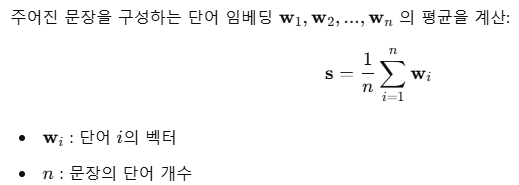

In [1]:
texts = [
"Natural language processing is amazing",
"Sentence embeddings are useful for NLP tasks"
]

In [2]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 24.3 MB/s eta 0:00:00


In [20]:
import numpy as np
from nltk.tokenize import word_tokenize  # 문장에서 단어 추출
from gensim.models import Word2Vec  # 단어를 학습 가능한 벡터로 변환
import nltk
nltk.download('punkt_tab')# 문장을 토큰화 하는데 필요한 패키지
# words = word_tokenize(texts[0])
# print(texts[0])
# print(words)
tokenized_sentences = [word_tokenize(word.lower()) for word in texts]
# Word2Vec 학습
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)
# 문장 임베딩 함수(평균 벡터)
def sentece_embedding(sentence, model):
  words = word_tokenize(sentence.lower())
  words_vectors = [model.wv[word] for word in words if word in model.wv]
  return np.mean(words_vectors,axis=0) if words_vectors else np.zeros(model.vector_size)

# 예제 문장 벡터화
sentece_vec = sentece_embedding("Natural language processing is amazing",word2vec_model)
sentece_vec.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


(100,)

TF-IDF(Term Frequency - Inverse Document Frequency)  기반 문장 벡터화
  - 단어 임베딩의 가중 평균을 사용하여 문장 벡터 생성
  - 중요한 단어에 높은 가중치를 부여하여 의미를 더 잘 반영

- TF - 단순히 등장횟수
- IDF - 등장횟수만 보는것이 아니라 해당단어가 전체 문서집합에서 얼마나 자주 등장하는지를 함께 고려

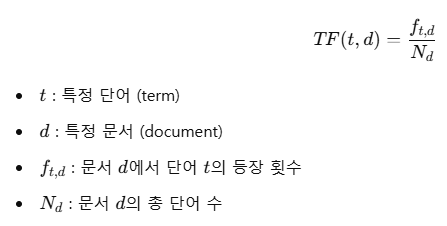

In [22]:
# I love natural language processing and natural language learning
# natural : 2
# 전체 단어수 : 9
# TF : 2/9
print("TF", round(2/9,3))

TF 0.222


IDF(Inverse Document Frequency) - 역문서 빈도
  - 단어가 전체 문서에서 얼마나 희귀한지 측정하는 지표
  - 많은 문서에서 등장하는 흔한단어는 중요도가 낮아야 하므로 이를 조정하는 역활

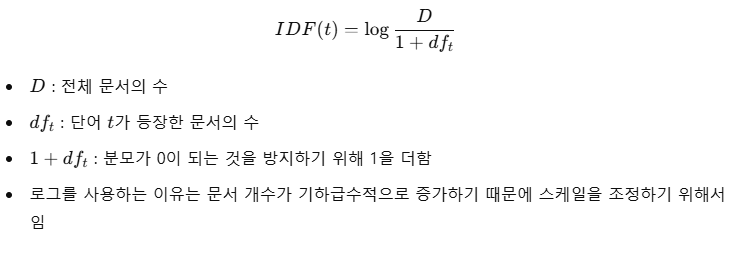

In [30]:
'''
I love natual language processing
Natural language processing is fun
Machine learning and deep learing are powerful
'''
# natural  2
# 전체 문장의수 3
# log(3/1+2) = log(1) = 0  --> 자주 등장하는 단어이므로 중요도가 낮음

# deep  1
# log(3/1+1)
np.log(3/2)

0.4054651081081644

TF-IDF 계산
  - TF와 IDF를 곱하면  TF * IDF
  - 특정 문서에서 자주등장하지만 전체 문서에서는 드문 단어일수록 높은 점수를 갖는다

TF-IDF 실습

In [40]:
!pip install konlpy
import numpy as np
import math
from nltk.tokenize import word_tokenize  # 문장에서 단어 추출
# 샘플 문서
documents = [
"I love natual language processing",
"Natural language processing is fun",
"Machine learning and deep learing are powerful"
]

# 토큰화
tokenizer_docs = [ word_tokenize(doc.lower()) for doc in documents]
# TF 계산
def compute_tf(doc):  # 토크나이져한 리스트를 전달
  tf_dict = {}
  for word in doc:
    tf_dict[word] = tf_dict.get(word,0) + 1  # 리스트의 각 단어의 등장 횟수를 카운트
  for word in tf_dict:
    tf_dict[word] /= len(doc)  # 각 단어의 빈도수에 전체 문장의 수로 나눔
  return tf_dict

In [41]:
tf_lists = [compute_tf(doc) for doc in tokenizer_docs]
tf_lists

[{'i': 0.2, 'love': 0.2, 'natual': 0.2, 'language': 0.2, 'processing': 0.2},
 {'natural': 0.2, 'language': 0.2, 'processing': 0.2, 'is': 0.2, 'fun': 0.2},
 {'machine': 0.14285714285714285,
  'learning': 0.14285714285714285,
  'and': 0.14285714285714285,
  'deep': 0.14285714285714285,
  'learing': 0.14285714285714285,
  'are': 0.14285714285714285,
  'powerful': 0.14285714285714285}]

In [42]:
# IDF 계산   특정 단어가 전체문장에서 등장하는 횟수
def compute_idf(docs):
  idf_dict = {}
  D = len(docs)
  # 전체문장에서 단어들을 추출  - set을 이용
  temp = []
  all_words = set(word for doc in docs for word in doc)

  # 각 단어가
  for word in all_words:
    # 전체문장의 각 문장에 포함되면 1로 만들어서 리스트화
    df_t = sum(1 for doc in docs if word in doc) # 등장 횟수
    idf_dict[word] = math.log(D/(1 + df_t)) # IDF 계산
  return idf_dict



In [43]:
idf_dict = compute_idf(tokenizer_docs)

In [52]:
# tf-idf 계산
tfidf_list = []
for tf in tf_lists:  # tf는 dict
  tfidf = {word:tf[word] for word in tf}
  tfidf_list.append(tfidf)

#결과 출력
for i, tfidf in enumerate(tfidf_list):
  print(f"문장 {i+1}: {tfidf}")

문장 1: {'i': 0.2, 'love': 0.2, 'natual': 0.2, 'language': 0.2, 'processing': 0.2}
문장 2: {'natural': 0.2, 'language': 0.2, 'processing': 0.2, 'is': 0.2, 'fun': 0.2}
문장 3: {'machine': 0.14285714285714285, 'learning': 0.14285714285714285, 'and': 0.14285714285714285, 'deep': 0.14285714285714285, 'learing': 0.14285714285714285, 'are': 0.14285714285714285, 'powerful': 0.14285714285714285}


scikit-learn 을 활용한 TF-IDF 계산

In [51]:
# 샘플 문서
documents = [
"I love natual language processing",
"Natural language processing is fun",
"Machine learning and deep learing are powerful"
]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
print('문장들',documents)
print('단어목록:',vectorizer.get_feature_names_out())
print("TF-IDF 행렬:\n",tfidf_matrix.toarray() )

문장들 ['I love natual language processing', 'Natural language processing is fun', 'Machine learning and deep learing are powerful']
단어목록: ['and' 'are' 'deep' 'fun' 'is' 'language' 'learing' 'learning' 'love'
 'machine' 'natual' 'natural' 'powerful' 'processing']
TF-IDF 행렬:
 [[0.         0.         0.         0.         0.         0.42804604
  0.         0.         0.5628291  0.         0.5628291  0.
  0.         0.42804604]
 [0.         0.         0.         0.49047908 0.49047908 0.37302199
  0.         0.         0.         0.         0.         0.49047908
  0.         0.37302199]
 [0.37796447 0.37796447 0.37796447 0.         0.         0.
  0.37796447 0.37796447 0.         0.37796447 0.         0.
  0.37796447 0.        ]]


TF-IDF 기반의 문장 벡터

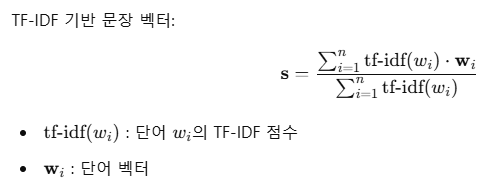